## Dependencies

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

from scipy.stats import skew
from scipy.stats import chi2_contingency
from scipy.interpolate import make_interp_spline
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings("ignore")


print("All Modules Imported Successfully")

All Modules Imported Successfully


## Read Dataset

In [6]:
data = pd.read_csv("../data/auto_mpg_dataset.csv")
autoMPG_df = pd.DataFrame(data)

In [7]:
autoMPG_df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,27.0
394,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,44.0
395,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,32.0
396,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,28.0


## Business Case
Cars of different variants of different models of various Car manufacturing companies from origin countries such as the USA, Japan and Europe. Fuel consumption of a car is affected by various factors such as Model year, Horsepower, Number of Cylinders present, displacement, Weight and Acceleration of the car.

The business problem we should solve here is: Find which factors mostly affect the Fuel consumption of a car in order to improve the mpg value. Hence build a model to predict the mpg value of each car. 

## Variable Description
The variables in the dataset are as follows:

1) cylinders: contains the number of cylinders present in the car

2) displacement: contains the Displacement of the car

3) horsepower: contains the Horsepower of the car

4) weight: contains the weight of the car

5) acceleration: contains the Acceleration of the car

6) model_year: contains the model year of the car

7) origin: contains the origin country which car belong to

8) car_name: contains the name of the car(Brand-Model-Variant)

9) mpg: contains the fuel consumption value(in Miles per Gallon) for car



## Overview of the Dataset

In [11]:
autoMPG_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car_name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


## Checking Missing Values

In [13]:
autoMPG_df.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
mpg             0
dtype: int64

## Fill Missing Values with Mean and Mode

In [86]:
autoMPG_df['cylinders'].fillna(autoMPG_df['cylinders'].mean(), inplace=True)
autoMPG_df['displacement'].fillna(autoMPG_df['displacement'].mean(), inplace=True)
autoMPG_df['horsepower'].fillna(autoMPG_df['horsepower'].mean(), inplace=True)
autoMPG_df['weight'].fillna(autoMPG_df['weight'].mean(), inplace=True)
autoMPG_df['acceleration'].fillna(autoMPG_df['acceleration'].mean(), inplace=True)
autoMPG_df['mpg'].fillna(autoMPG_df['mpg'].mean(), inplace=True)

autoMPG_df['model_year'].fillna(autoMPG_df['model_year'].mode()[0], inplace=True)
autoMPG_df['origin'].fillna(autoMPG_df['origin'].mode()[0], inplace=True)

## Univariate Analysis

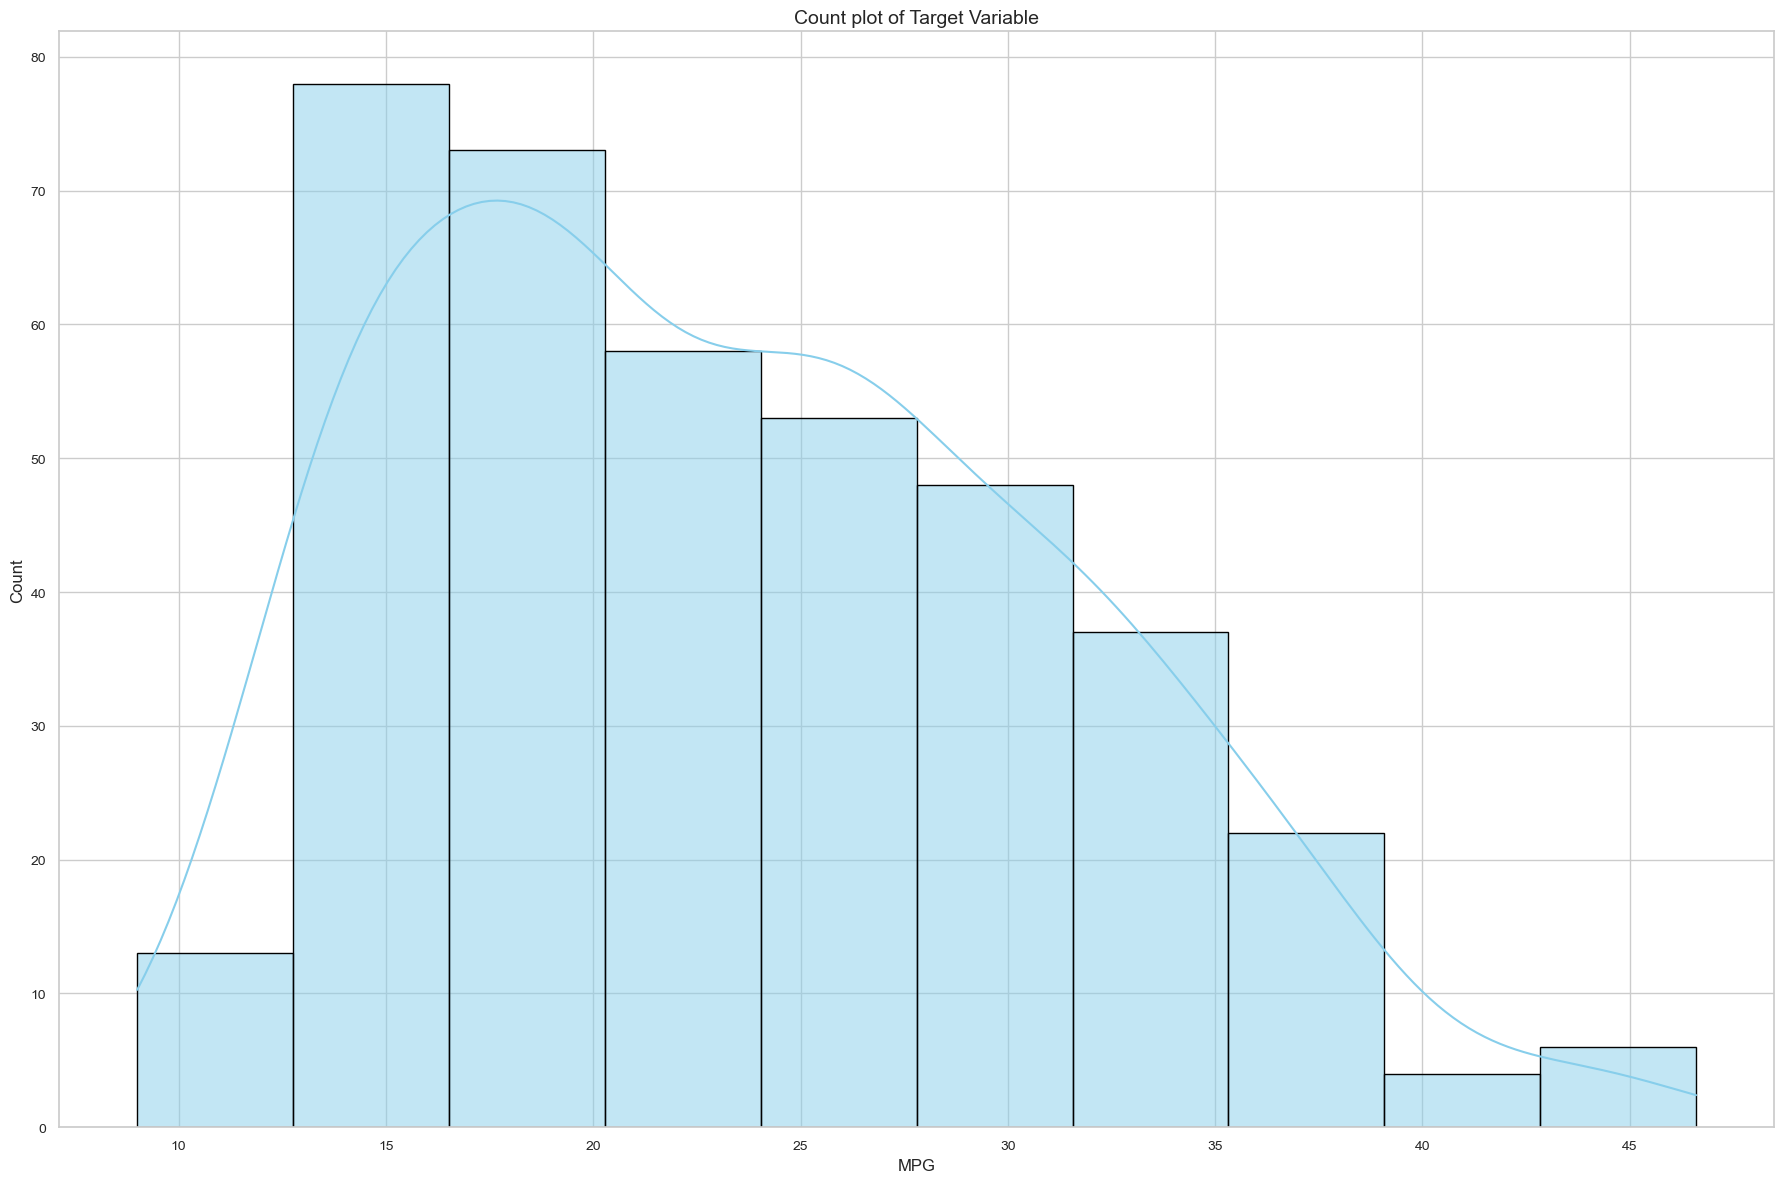

In [89]:
plt.figure(figsize=(18, 12))
sns.histplot(autoMPG_df['mpg'], kde = True, color='skyblue', edgecolor='black', bins=10)
plt.title(f'Count plot of Target Variable')
plt.xlabel('MPG')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

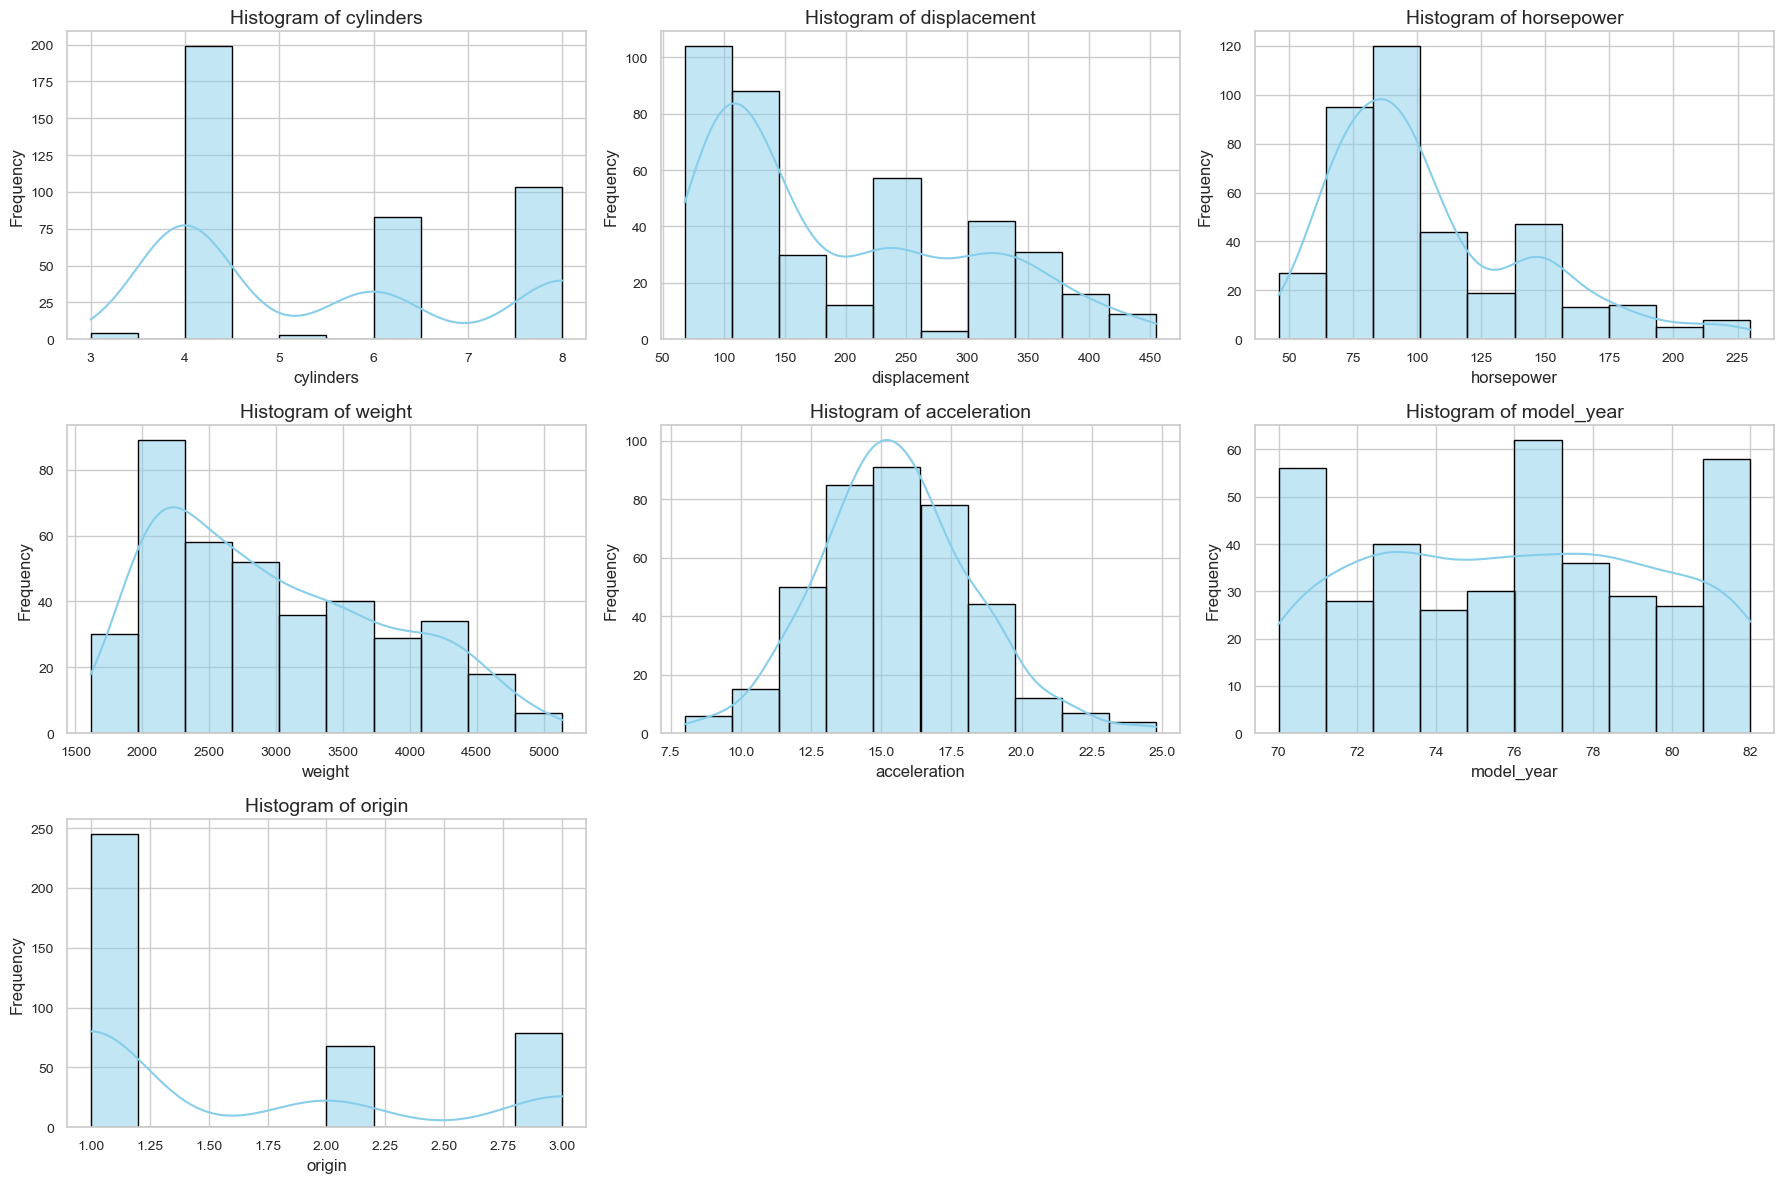

In [90]:
all_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']

sns.set(style="whitegrid")
plt.rcParams.update({'axes.titlesize': 14, 'axes.labelsize': 12, 'xtick.labelsize': 10, 'ytick.labelsize': 10})

plt.figure(figsize=(18, 12))
for i, col in enumerate(all_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(autoMPG_df[col], kde = True, color='skyblue', edgecolor='black', bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

***Insights***

1. **Cylinders**: 
   - The distribution is skewed towards 4-cylinder engines, which dominate the data.
   - 6-cylinder engines are the second most common, followed by 8-cylinder ones.
   - 5 and 7-cylinder configurations are very rare, suggesting most cars have 4, 6, or 8 cylinders.

2. **Displacement**: 
   - The distribution is right-skewed, with the majority of vehicles having a displacement between 100 and 200 cubic inches.
   - A few vehicles have very large displacement values, above 300, which could represent higher-performance or larger vehicles.

3. **Horsepower**: 
   - The data shows an unusual distribution, indicating possible issues such as negative or outlier values, which need investigation.
   - Apart from the outliers, most vehicles have horsepower between 75 and 150, with a peak around 100 horsepower.

4. **Weight**: 
   - The weight distribution is right-skewed, with most cars weighing between 2000 and 3000 pounds.
   - Heavier cars, above 3500 pounds, are less common, which might represent older or larger cars, like SUVs or trucks.

5. **Acceleration**: 
   - The distribution is fairly normal, centered around 15 seconds for 0-60 mph acceleration.
   - Most cars have acceleration times between 10 and 20 seconds, indicating typical performance vehicles.

6. **Model Year**: 
   - The distribution is relatively uniform, with a slight peak around the late 70s to early 80s.
   - This indicates that cars from multiple years are well-represented, but the late 70s models are slightly more common.

7. **Origin**: 
   - Most cars originate from region 1, likely representing American-made cars.
   - Region 2 and 3 have fewer cars in comparison, suggesting that American cars dominate the dataset

### Outlier Treatment for Horsepower

In [94]:
# Check if there are any negative values in 'horsepower' and remove those rows
autoMPG_df = autoMPG_df[autoMPG_df['horsepower'] >= 0]

## Summary Statistics

In [96]:
autoMPG_df.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg,horsepower_zscore,acceleration_zscore
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,23.445918,0.123562,-0.009705
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,7.805007,0.003152,1.000426
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000,0.118774,-2.744360
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,17.000000,0.121149,-0.650215
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,22.750000,0.122664,-0.024691
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,29.000000,0.125325,0.528308
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000,0.133840,3.347698


## Skewness and Kurtosis

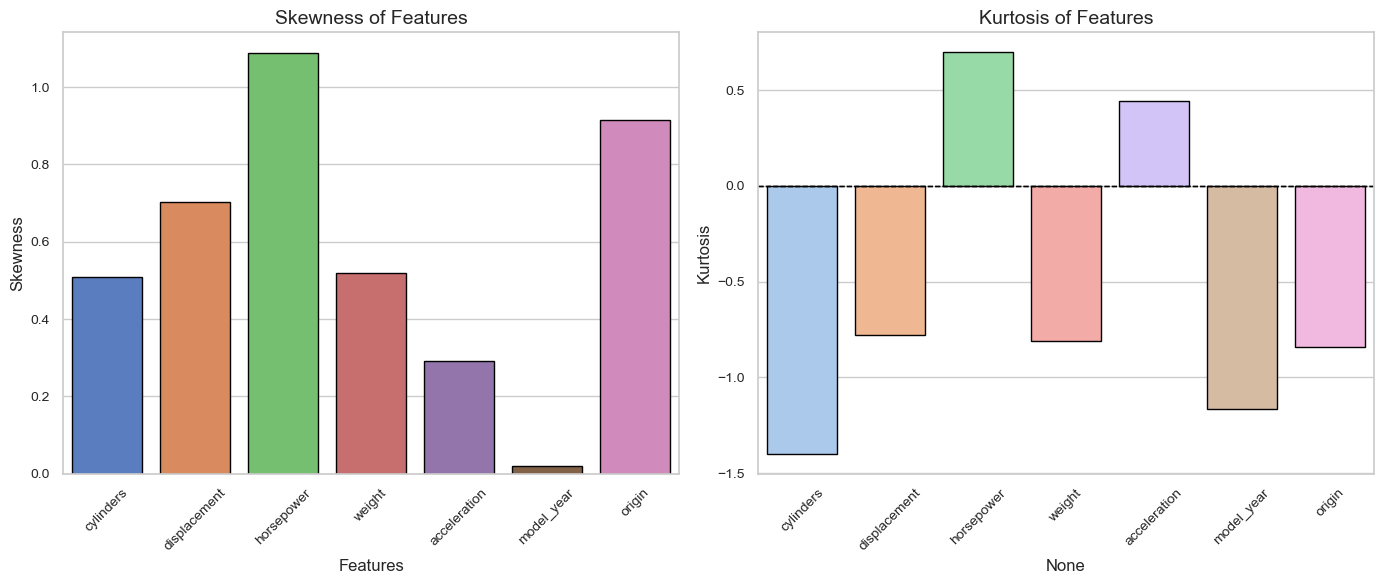

In [101]:
skewness_values_filtered = autoMPG_df.drop(columns=['car_name', 'mpg', 'acceleration_group', 'weight_category', 'horsepower_zscore', 'acceleration_zscore']).skew()
kurtosis_values_filtered = autoMPG_df.drop(columns=['car_name', 'mpg', 'acceleration_group', 'weight_category', 'horsepower_zscore', 'acceleration_zscore']).kurtosis()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=skewness_values_filtered.index, y=skewness_values_filtered.values, palette='muted', ax=ax[0], edgecolor='black')
ax[0].set_title('Skewness of Features')
ax[0].set_xlabel('Features')
ax[0].set_ylabel('Skewness')
plt.axhline(0, color='black', linewidth=1, linestyle='--')
ax[0].set_xticklabels(skewness_values_filtered.index, rotation=45)

sns.barplot(x=kurtosis_values_filtered.index, y=kurtosis_values_filtered.values, palette='pastel', ax=ax[1], edgecolor='black')
ax[1].set_title('Kurtosis of Features')
ax[0].set_xlabel('Features')
ax[1].set_ylabel('Kurtosis')
plt.axhline(0, color='black', linewidth=1, linestyle='--')
ax[1].set_xticklabels(kurtosis_values_filtered.index, rotation=45)

plt.tight_layout()
plt.show()


***Insights***

### Skewness Insights:
- **Displacement, Weight, and Cylinders**: These features have slight positive skewness, meaning they are right-skewed with long tails on the right. This indicates that there are a few cars with very high values for displacement, weight, and cylinders compared to the rest of the dataset.
- **Acceleration**: Slight positive skew, meaning there are more cars with lower acceleration, but a few with higher than average acceleration.
- **Model Year and Origin**: Both of these features show a very slight skew close to zero, indicating a nearly symmetric distribution. This suggests that these features are well-balanced in the dataset.

### Kurtosis Insights:
- **All Features** (Cylinders, Displacement, Weight, Acceleration, Model Year, Origin): The kurtosis values for these features are close to 0 or slightly negative, indicating a platykurtic distribution (flatter than a normal distribution).

## Variable Binning or Bucketing

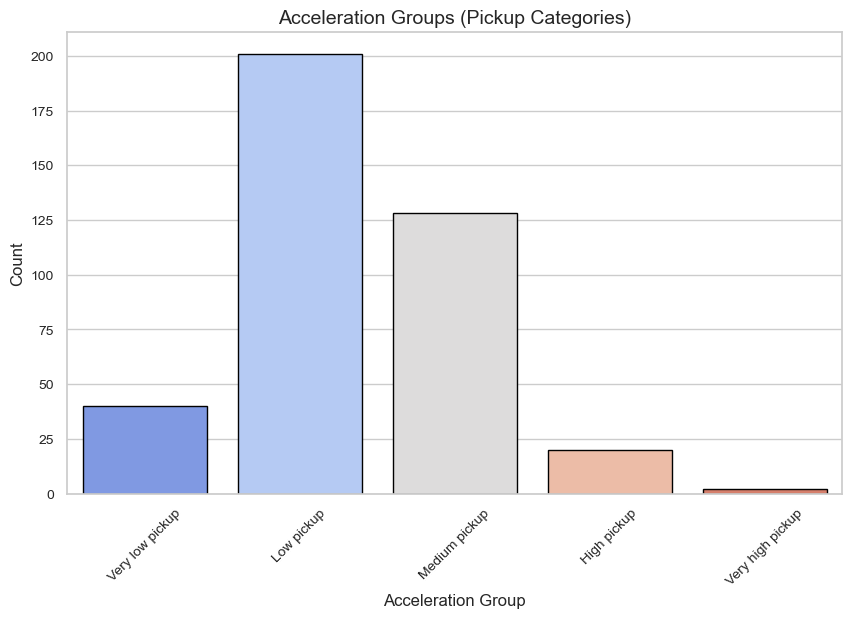

In [107]:
acceleration_bins = [8, 12, 16, 20, 24, float('inf')]
acceleration_labels = ['Very low pickup', 'Low pickup', 'Medium pickup', 'High pickup', 'Very high pickup']

autoMPG_df['acceleration_group'] = pd.cut(autoMPG_df['acceleration'], bins=acceleration_bins, labels=acceleration_labels)

plt.figure(figsize=(10, 6))
sns.countplot(data = autoMPG_df, x='acceleration_group', palette='coolwarm',  edgecolor='black')
plt.title('Acceleration Groups (Pickup Categories)')
plt.xlabel('Acceleration Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

***Insights***
The bar chart represents the distribution of vehicles across different **acceleration categories**, which are grouped based on their pickup characteristics:

1. **Low Pickup (12-16 acceleration):**
   - The majority of vehicles fall into this category, with over 200 vehicles having low pickup.
   - This suggests that most cars in the dataset have moderate acceleration capabilities.

2. **Medium Pickup (16-20 acceleration):**
   - The second-largest group, containing over 125 vehicles, represents vehicles with medium pickup.
   - This indicates that a significant number of vehicles have moderate acceleration rates.

3. **Very Low Pickup (8-12 acceleration):**
   - A smaller group, with around 25 vehicles, has very low pickup, indicating slower acceleration.

4. **High Pickup (20-24 acceleration):**
   - A relatively small number of vehicles, approximately 30, fall into this high pickup group, reflecting cars with better acceleration performance.

5. **Very High Pickup (24+ acceleration):**
   - This is the smallest group, with very few vehicles (less than 10) classified as having very high pickup.
   - It shows that very few vehicles in the dataset are high-performance in terms of acceleration.

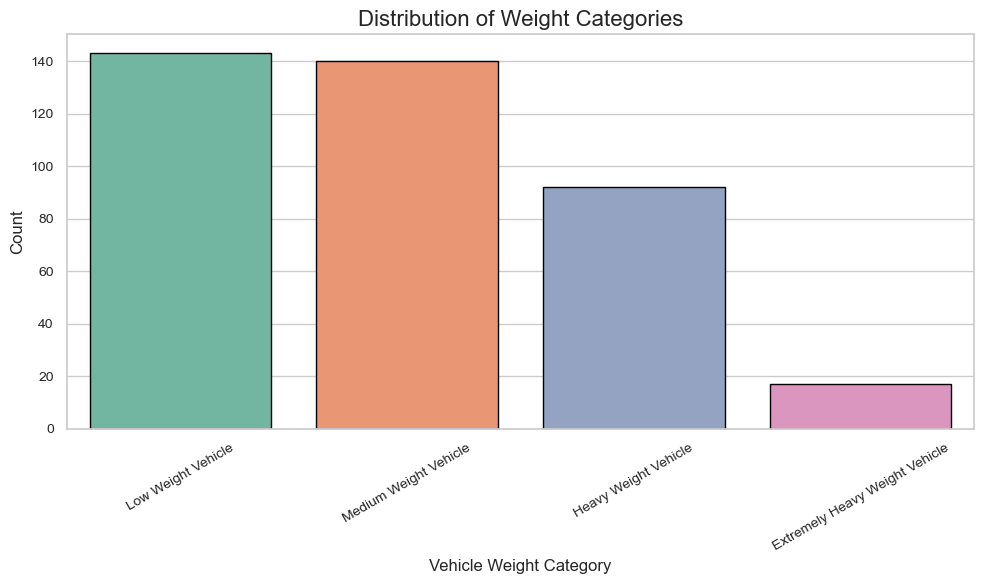

In [110]:
weight_bins = [0, 2500, 3500, 4500, float('inf')]
weight_labels = ['Low Weight Vehicle', 'Medium Weight Vehicle', 'Heavy Weight Vehicle', 'Extremely Heavy Weight Vehicle']

autoMPG_df['weight_category'] = pd.cut(autoMPG_df['weight'], bins=weight_bins, labels=weight_labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='weight_category', data = autoMPG_df, palette='Set2',  edgecolor='black')

plt.title('Distribution of Weight Categories', fontsize=16)
plt.xlabel('Vehicle Weight Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


***Insights***

The bar chart displays the distribution of vehicles across **four weight categories**:

1. **Low Weight Vehicle (1500 to 2500 lbs):**
   - This is the largest category, with over 140 vehicles classified as low weight.
   - A significant proportion of vehicles in the dataset are lightweight, suggesting that many vehicles are relatively small and likely fuel-efficient.

2. **Medium Weight Vehicle (2500 to 3500 lbs):**
   - The second-largest category, nearly matching the low-weight category, also has over 140 vehicles.
   - This shows that medium-weight vehicles are almost as prevalent as low-weight ones, which likely includes mid-sized cars.

3. **Heavy Weight Vehicle (3500 to 4500 lbs):**
   - This group contains fewer vehicles compared to the first two, with about 90 vehicles categorized as heavy weight.
   - While still common, heavy-weight vehicles are less prevalent than lower-weight vehicles.

4. **Extremely Heavy Weight Vehicle (4500+ lbs):**
   - This is the smallest group, with very few vehicles falling into this category, likely less than 20.
   - Extremely heavy vehicles are rare in this dataset, likely representing large trucks or SUVs.


## Bivariate Analysis

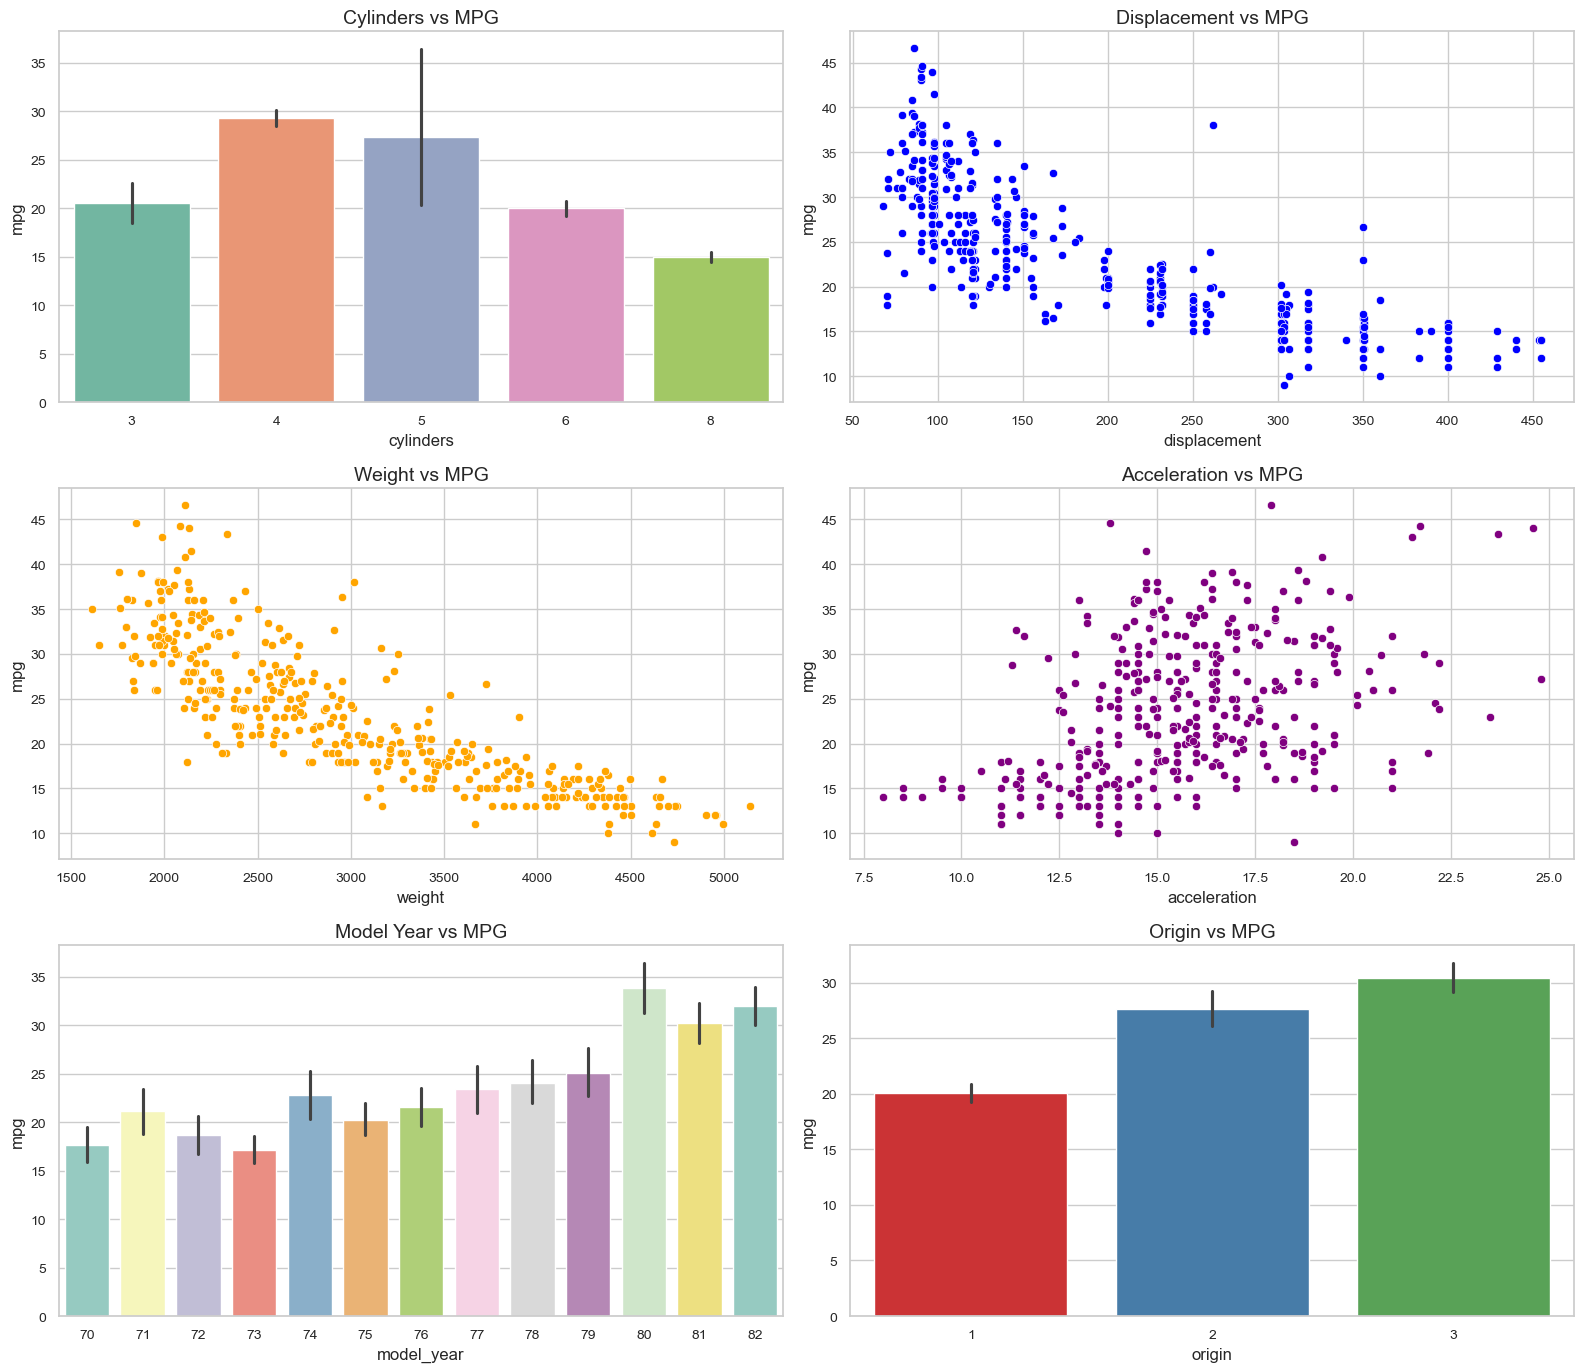

In [114]:
plt.figure(figsize=(16, 18))

# Plot 1: Cylinders vs MPG (Categorical variable, use bar plot for average mpg per cylinder)
plt.subplot(4, 2, 1)
sns.barplot(x='cylinders', y='mpg', data=autoMPG_df, palette='Set2', estimator='mean')
plt.title('Cylinders vs MPG')

# Plot 2: Displacement vs MPG (Continuous variable, use scatter plot)
plt.subplot(4, 2, 2)
sns.scatterplot(x='displacement', y='mpg', data=autoMPG_df, color='blue')
plt.title('Displacement vs MPG')

# Plot 3: Weight vs MPG (Continuous variable, use scatter plot)
plt.subplot(4, 2, 3)
sns.scatterplot(x='weight', y='mpg', data=autoMPG_df, color='orange')
plt.title('Weight vs MPG')

# Plot 4: Acceleration vs MPG (Continuous variable, use scatter plot)
plt.subplot(4, 2, 4)
sns.scatterplot(x='acceleration', y='mpg', data=autoMPG_df, color='purple')
plt.title('Acceleration vs MPG')

# Plot 5: Model Year vs MPG (Categorical variable, use bar plot for average mpg per year)
plt.subplot(4, 2, 5)
sns.barplot(x='model_year', y='mpg', data=autoMPG_df, palette='Set3', estimator='mean')
plt.title('Model Year vs MPG')

# Plot 6: Origin vs MPG (Categorical variable, use bar plot for average mpg per origin)
plt.subplot(4, 2, 6)
sns.barplot(x='origin', y='mpg', data=autoMPG_df, palette='Set1', estimator='mean')
plt.title('Origin vs MPG')

plt.tight_layout()

# Show the plots
plt.show()


***Insights***

1. **Cylinders vs MPG:**
   - Vehicles with 4 cylinders have the highest average MPG, indicating better fuel efficiency.
   - As the number of cylinders increases (6 or 8), the MPG decreases significantly, showing lower fuel efficiency for cars with larger engines.
   - Cars with 5 cylinders have a higher-than-expected MPG, though this group has fewer data points, indicated by the larger error bars.

2. **Displacement vs MPG:**
   - There is a clear negative relationship between engine displacement and MPG.
   - As engine displacement increases, MPG decreases. This is expected since larger engine sizes generally consume more fuel.

3. **Weight vs MPG:**
   - Similar to displacement, there's a strong inverse correlation between weight and MPG.
   - Heavier vehicles tend to have lower MPG, while lighter vehicles achieve better fuel efficiency.
   - The scatter plot shows a consistent downward trend.

4. **Acceleration vs MPG:**
   - There is no strong correlation between acceleration and MPG. The scatter is quite dispersed.
   - However, vehicles with mid-range acceleration (10-20) seem to have a wide range of MPG values.
   - Vehicles with very high acceleration (over 20) tend to have moderate MPG.

5. **Model Year vs MPG:**
   - There is a clear upward trend in MPG as the model year increases.
   - Vehicles from 1980 onwards tend to have significantly higher MPG than those from the early 70s, which could be due to advancements in fuel efficiency technologies and stricter emissions regulations during that period.

6. **Origin vs MPG:**
   - Vehicles from region 3 have the highest average MPG, followed by those from region 2.
   - Region 1 has the lowest MPG, suggesting that vehicles from this region are less fuel-efficient on average.

## Parametric and Non-parametric Tests

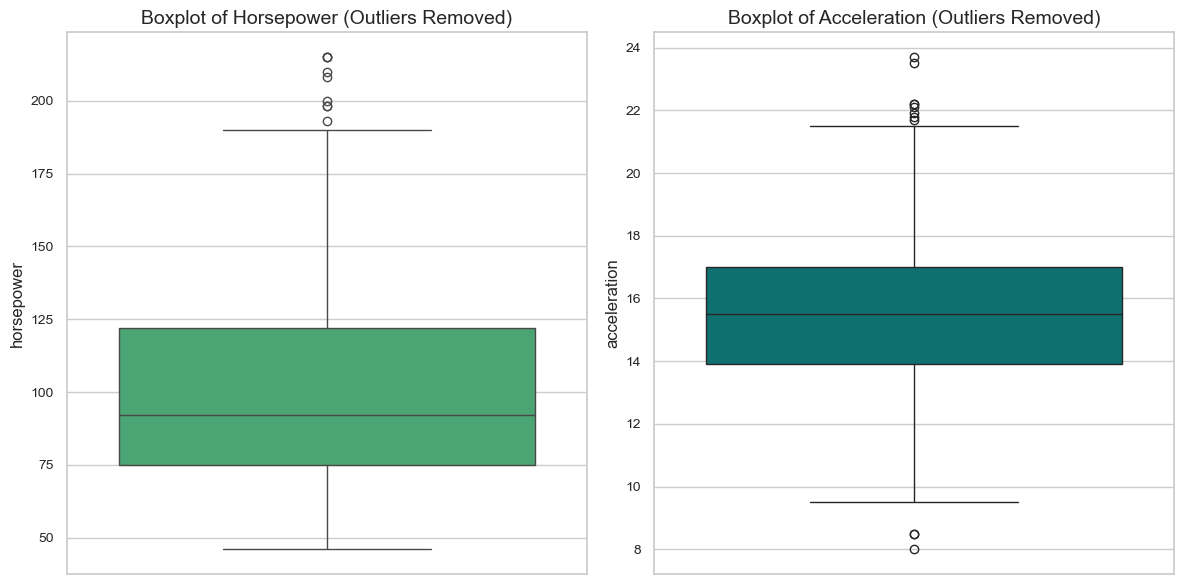

In [118]:
# Calculate Z-scores for horsepower and acceleration
autoMPG_df['horsepower_zscore'] = (autoMPG_df['horsepower'] - autoMPG_df['horsepower'].mean()) / autoMPG_df['horsepower'].std()
autoMPG_df['acceleration_zscore'] = (autoMPG_df['acceleration'] - autoMPG_df['acceleration'].mean()) / autoMPG_df['acceleration'].std()

# Remove outliers based on Z-score threshold (e.g., |Z-score| > 3)
data = autoMPG_df[(np.abs(autoMPG_df['horsepower_zscore']) < 3) & (np.abs(autoMPG_df['acceleration_zscore']) < 3)]

# Create boxplots with aesthetic color for horsepower and acceleration
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['horsepower'], color='mediumseagreen')
plt.title('Boxplot of Horsepower (Outliers Removed)')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['acceleration'], color='teal')
plt.title('Boxplot of Acceleration (Outliers Removed)')

plt.tight_layout()
plt.show()

In [120]:
#pearson's test for relation between two continuous variables
# between mpg and displacement
stat, p = pearsonr(autoMPG_df['mpg'], autoMPG_df['displacement'])
print(f'Stat={stat}, p={p}')

# between mpg and horsepower
stat, p = pearsonr(autoMPG_df['mpg'], autoMPG_df['horsepower'])
print(f'Stat={stat}, p={p}')

# between mpg and weight
stat, p = pearsonr(autoMPG_df['mpg'], autoMPG_df['weight'])
print(f'Stat={stat}, p={p}')
#between mpg and acceleration
stat, p = pearsonr(autoMPG_df['mpg'], autoMPG_df['acceleration'])
print(f'Stat={stat}, p={p}')

Stat=-0.8051269467104585, p=1.660641827796831e-90
Stat=-0.7784267838977776, p=7.0319890293952315e-81
Stat=-0.8322442148315756, p=6.015296051434213e-102
Stat=0.4233285369027873, p=1.7785761248041462e-18


In [122]:
# ANOVA test

origin_groups = [autoMPG_df['mpg'][autoMPG_df['origin'] == i] for i in autoMPG_df['origin'].unique()]
f_statistic, p_value = f_oneway(*origin_groups)

print(f"ANOVA Test for MPG across different origins:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Perform ANOVA test for MPG across different cylinder counts
cylinder_groups = [autoMPG_df['mpg'][autoMPG_df['cylinders'] == i] for i in autoMPG_df['cylinders'].unique()]
f_statistic, p_value = f_oneway(*cylinder_groups)

print(f"\nANOVA Test for MPG across different cylinder counts:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

ANOVA Test for MPG across different origins:
F-statistic: 96.60153016314955
P-value: 8.67381844800945e-35

ANOVA Test for MPG across different cylinder counts:
F-statistic: 172.95462925955226
P-value: 8.785541055264141e-85


In [124]:
# Selecting data for the two groups (4 cylinders and 6 cylinders)
mpg_4cyl = autoMPG_df[autoMPG_df['cylinders'] == 4]['mpg']
mpg_6cyl = autoMPG_df[autoMPG_df['cylinders'] == 6]['mpg']

# Perform Z-test
z_stat, p_value = ztest(mpg_4cyl, mpg_6cyl)
print(f"Z-statistic = {z_stat}, P-value = {p_value}")

Z-statistic = 13.704896898546142, P-value = 9.490201866681145e-43


In [126]:
t_stat, p_value = ttest_ind(mpg_4cyl, mpg_6cyl)
print(f"T-statistic = {t_stat}, P-value = {p_value}")

T-statistic = 13.704896898546142, P-value = 4.617651634899658e-33


In [128]:
# Create a contingency table
contingency_table = pd.crosstab(autoMPG_df['origin'], autoMPG_df['cylinders'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: Chi2-statistic = {chi2_stat}, P-value = {p_value}")

Chi-Square Test: Chi2-statistic = 180.71869417150074, P-value = 7.272757264481584e-35


## Multivariate Analysis

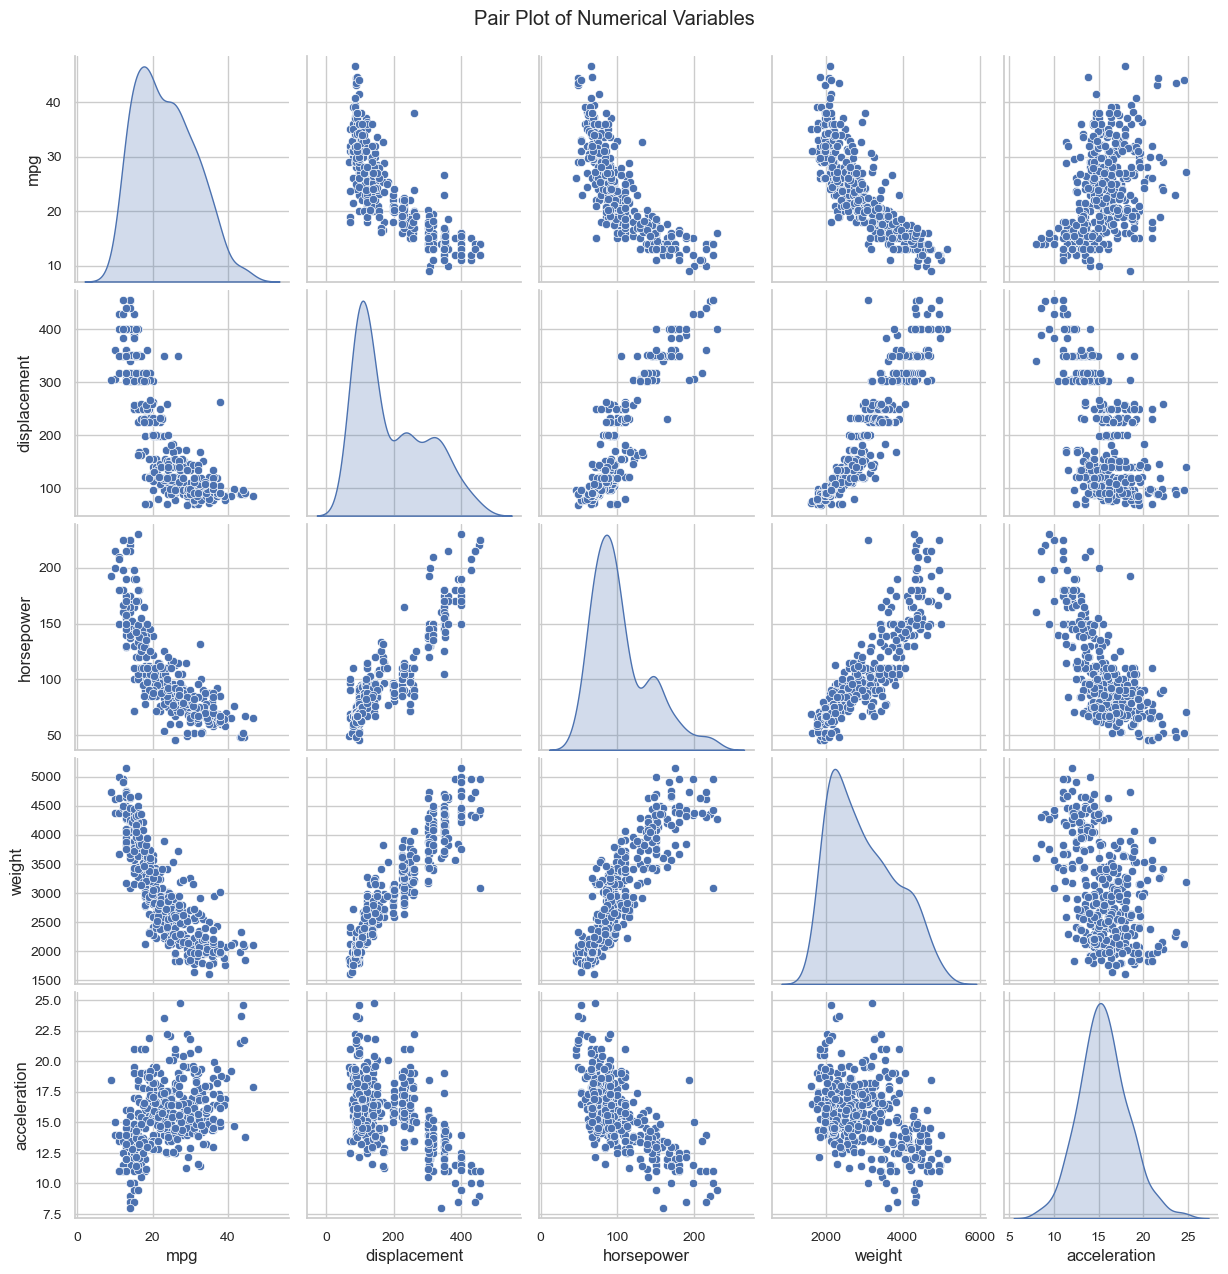

In [131]:
sns.pairplot(autoMPG_df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


***Insights***

- **Fuel efficiency (`mpg`)** is negatively correlated with **displacement**, **horsepower**, and **weight**. This means that vehicles with larger engines, more power, and greater weight tend to have lower fuel efficiency.
- **Displacement**, **horsepower**, and **weight** are positively correlated with each other, indicating that heavier vehicles often have larger engines and more horsepower.
- **Acceleration** shows weaker relationships with the other variables, suggesting that it's less influenced by factors like engine size or vehicle weight.

The distribution of the variables also highlights that most vehicles in the dataset are clustered within certain ranges for fuel efficiency, displacement, weight, and acceleration.

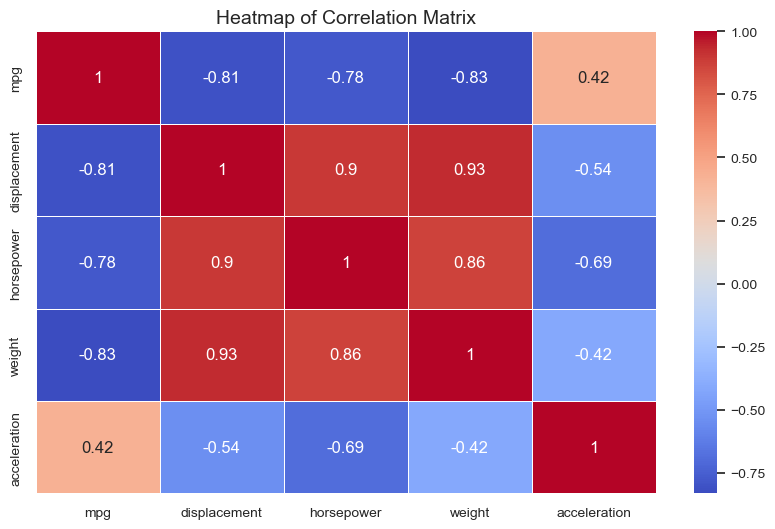

In [133]:
corr_matrix = autoMPG_df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


***Insights***

- **mpg** (fuel efficiency) is **strongly negatively correlated** with **displacement** (-0.8), **weight** (-0.83), and to a lesser extent, **horsepower** (-0.074), indicating that larger engines, heavier cars, and more powerful engines tend to have lower fuel efficiency.
- **mpg** has a **moderate positive correlation** with **acceleration** (0.42), meaning cars with better acceleration tend to have higher fuel efficiency.
  
- **Displacement** has a **strong positive correlation** with **weight** (0.93) and **horsepower** (0.079). This indicates that cars with larger engines also tend to be heavier and more powerful.
  
- **Weight** shows a **strong positive correlation** with **displacement** (0.93) and a **negative correlation** with **acceleration** (-0.42), meaning that heavier cars tend to have larger engines but slower acceleration.

## Feature Importance

In [136]:
X = autoMPG_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']]
y = autoMPG_df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

coefficients = lr.coef_

feature_importance = np.abs(coefficients)

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
6,origin,1.613457
5,model_year,0.767743
0,cylinders,0.345789
4,acceleration,0.037950
2,horsepower,0.021302
1,displacement,0.015109
3,weight,0.006142


## Feature Importance - Insights

1. **Origin (Importance: 1.268791)**:
   - **Origin** has the highest importance score, indicating that the country or region where the car was manufactured plays a significant role in predicting fuel efficiency. This suggests that cars from certain origins may be more fuel-efficient than others.

2. **Model Year (Importance: 0.805603)**:
   - The second most important feature is the **model year**. Newer cars might be more fuel-efficient due to advances in technology, emissions standards, or other innovations. The importance score reflects how the age of the car influences its MPG.

3. **Acceleration (Importance: 0.125651)**:
   - **Acceleration** has a moderate impact on fuel efficiency. While not as important as origin or model year, it still plays a role in determining how efficiently a car can convert fuel into forward motion.

4. **Cylinders (Importance: 0.112019)**:
   - **Cylinders** play a significant role in fuel consumption, but compared to model year and origin, their importance is lower. This is consistent with the understanding that more cylinders often result in lower fuel efficiency.

5. **Displacement (Importance: 0.012167)**:
   - **Displacement** has a very small importance score, suggesting that engine size (which displacement represents) does not heavily impact MPG when compared to other features.

6. **Weight (Importance: 0.007026)**:
   - **Weight** also has minimal importance in this case. While heavier cars generally consume more fuel, this analysis indicates that weight is not a strong determinant of fuel efficiency compared to the more important features like origin or model year.

7. **Horsepower (Importance: 0.000006)**:
   - **Horsepower** has the smallest importance value, practically zero. This implies that the engine's power output has almost no influence on predicting MPG in this particular model.

## Feasible Model Building and Model Selection

In [142]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

n_features = X_train.shape[1]

#------- LINEAR REGRESSION ----------

linear_model = LinearRegression()

ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)
elasticnet_model = ElasticNet(alpha=0.1)

# KFold cross-validation
kf = KFold(n_splits=15, shuffle=True, random_state=42)

linear_model.fit(X_train, y_train)

y_val_pred = linear_model.predict(X_val)
r2_val = r2_score(y_val, y_val_pred)
adjusted_r2_val = adjusted_r2_score(r2_val, len(y_val), n_features)

# Cross-validation score for Linear Regression
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring='r2')
mean_cv_score = np.mean(cv_scores)

print(f"Linear Regression:")
print(f"Validation R-squared: {r2_val}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val}")
print(f"Cross-validation R-squared (Mean): {mean_cv_score}")
print('-' * 50)

# Fitting Ridge regularization on Linear Regression
ridge_model.fit(X_train, y_train)
y_val_pred_ridge = ridge_model.predict(X_val)
r2_val_ridge = r2_score(y_val, y_val_pred_ridge)
adjusted_r2_val_ridge = adjusted_r2_score(r2_val_ridge, len(y_val), n_features)
cv_scores_ridge = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring='r2')
mean_cv_score_ridge = np.mean(cv_scores_ridge)

print(f"Ridge Regression on Linear Regression (Regularized):")
print(f"Validation R-squared: {r2_val_ridge}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_ridge}")
print(f"Cross-validation R-squared (Mean): {mean_cv_score_ridge}")
print('-' * 50)

# Fitting Lasso regularization on Linear Regression
lasso_model.fit(X_train, y_train)
y_val_pred_lasso = lasso_model.predict(X_val)
r2_val_lasso = r2_score(y_val, y_val_pred_lasso)
adjusted_r2_val_lasso = adjusted_r2_score(r2_val_lasso, len(y_val), n_features)
cv_scores_lasso = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring='r2')
mean_cv_score_lasso = np.mean(cv_scores_lasso)

print(f"Lasso Regression on Linear Regression(Regularized):")
print(f"Validation R-squared: {r2_val_lasso}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_lasso}")
print(f"Cross-validation R-squared (Mean): {mean_cv_score_lasso}")
print('-' * 50)

# Fitting ElasticNet regularization on Linear Regression
elasticnet_model.fit(X_train, y_train)
y_val_pred_elasticnet = elasticnet_model.predict(X_val)
r2_val_elasticnet = r2_score(y_val, y_val_pred_elasticnet)
adjusted_r2_val_elasticnet = adjusted_r2_score(r2_val_elasticnet, len(y_val), n_features)
cv_scores_elasticnet = cross_val_score(elasticnet_model, X_train, y_train, cv=kf, scoring='r2')
mean_cv_score_elasticnet = np.mean(cv_scores_elasticnet)

print(f"ElasticNet Regression on Linear Regression(Regularized):")
print(f"Validation R-squared: {r2_val_elasticnet}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_elasticnet}")
print(f"Cross-validation R-squared (Mean): {mean_cv_score_elasticnet}")
print('-' * 50)

#------- POLYNOMIAL REGRESSION OF DEGREE 2 ----------

# Apply Polynomial Features of degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

n_features_poly = X_train_poly.shape[1]

linear_model_poly = LinearRegression()

ridge_model_poly = Ridge(alpha=1.0)
lasso_model_poly = Lasso(alpha=0.1)
elasticnet_model_poly = ElasticNet(alpha=0.1)

# KFold cross-validation
kf = KFold(n_splits=15, shuffle=True, random_state=42)

linear_model_poly.fit(X_train_poly, y_train)

y_val_pred_poly = linear_model_poly.predict(X_val_poly)
r2_val_poly = r2_score(y_val, y_val_pred_poly)
adjusted_r2_val_poly = adjusted_r2_score(r2_val_poly, len(y_val), n_features_poly)

cv_scores_poly = cross_val_score(linear_model_poly, X_train_poly, y_train, cv=kf, scoring='r2')
mean_cv_score_poly = np.mean(cv_scores_poly)

print(f"Polynomial Linear Regression (Degree 2):")
print(f"Validation R-squared: {r2_val_poly}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_poly}")
print(f"Cross-validation R-squared (Mean): {mean_cv_score_poly}")
print('-' * 50)

# Fitting Ridge regularization on Polynomial Regression
ridge_model_poly.fit(X_train_poly, y_train)
y_val_pred_ridge_poly = ridge_model_poly.predict(X_val_poly)
r2_val_ridge_poly = r2_score(y_val, y_val_pred_ridge_poly)
adjusted_r2_val_ridge_poly = adjusted_r2_score(r2_val_ridge_poly, len(y_val), n_features_poly)
cv_scores_ridge_poly = cross_val_score(ridge_model_poly, X_train_poly, y_train, cv=kf, scoring='r2')
mean_cv_score_ridge_poly = np.mean(cv_scores_ridge_poly)

print(f"Ridge Regression (Degree 2, Regularized):")
print(f"Validation R-squared: {r2_val_ridge_poly}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_ridge_poly}")
print(f"Cross-validation R-squared (Mean): {mean_cv_score_ridge_poly}")
print('-' * 50)

# Fitting Lasso regularization on Polynomial Regression
lasso_model_poly.fit(X_train_poly, y_train)
y_val_pred_lasso_poly = lasso_model_poly.predict(X_val_poly)
r2_val_lasso_poly = r2_score(y_val, y_val_pred_lasso_poly)
adjusted_r2_val_lasso_poly = adjusted_r2_score(r2_val_lasso_poly, len(y_val), n_features_poly)
cv_scores_lasso_poly = cross_val_score(lasso_model_poly, X_train_poly, y_train, cv=kf, scoring='r2')
mean_cv_score_lasso_poly = np.mean(cv_scores_lasso_poly)

print(f"Lasso Regression (Degree 2, Regularized):")
print(f"Validation R-squared: {r2_val_lasso_poly}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_lasso_poly}")
print(f"Cross-validation R-squared (Mean): {mean_cv_score_lasso_poly}")
print('-' * 50)

# Fitting ElasticNet regularization on Polynomial Regression
elasticnet_model_poly.fit(X_train_poly, y_train)
y_val_pred_elasticnet_poly = elasticnet_model_poly.predict(X_val_poly)
r2_val_elasticnet_poly = r2_score(y_val, y_val_pred_elasticnet_poly)
adjusted_r2_val_elasticnet_poly = adjusted_r2_score(r2_val_elasticnet_poly, len(y_val), n_features_poly)
cv_scores_elasticnet_poly = cross_val_score(elasticnet_model_poly, X_train_poly, y_train, cv=kf, scoring='r2')
mean_cv_score_elasticnet_poly = np.mean(cv_scores_elasticnet_poly)

print(f"ElasticNet Regression (Degree 2, Regularized):")
print(f"Validation R-squared: {r2_val_elasticnet_poly}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_elasticnet_poly}")
print(f"Cross-validation R-squared (Mean): {mean_cv_score_elasticnet_poly}")
print('-' * 50)

#------- POLYNOMIAL REGRESSION OF DEGREE 3 ----------

# Apply Polynomial Features of degree 3
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Get the number of polynomial features
n_features_poly = X_train_poly.shape[1]

# Base Linear Regression model (Polynomial)
linear_model_poly = LinearRegression()

# Ridge, Lasso, ElasticNet regularization models applied to Polynomial Regression
ridge_model_poly = Ridge(alpha=1.0)
lasso_model_poly = Lasso(alpha=0.1)
elasticnet_model_poly = ElasticNet(alpha=0.1)

# KFold cross-validation
kf = KFold(n_splits=15, shuffle=True, random_state=42)

# Fitting the Polynomial Linear Regression model
linear_model_poly.fit(X_train_poly, y_train)

# Validation predictions and metrics for Polynomial Linear Regression
y_val_pred_poly = linear_model_poly.predict(X_val_poly)
r2_val_poly = r2_score(y_val, y_val_pred_poly)
adjusted_r2_val_poly = adjusted_r2_score(r2_val_poly, len(y_val), n_features_poly)

# Cross-validation score for Polynomial Linear Regression
cv_scores_poly = cross_val_score(linear_model_poly, X_train_poly, y_train, cv=kf, scoring='r2')
mean_cv_score_poly = np.mean(cv_scores_poly)

print(f"Polynomial Linear Regression (Degree 3):")
print(f"Validation R-squared: {r2_val_poly}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_poly}")
print(f"Cross-validation R-squared (Mean): {mean_cv_score_poly}")
print('-' * 50)

# Fitting Ridge regularization on Polynomial Regression
ridge_model_poly.fit(X_train_poly, y_train)
y_val_pred_ridge_poly = ridge_model_poly.predict(X_val_poly)
r2_val_ridge_poly = r2_score(y_val, y_val_pred_ridge_poly)
adjusted_r2_val_ridge_poly = adjusted_r2_score(r2_val_ridge_poly, len(y_val), n_features_poly)
cv_scores_ridge_poly = cross_val_score(ridge_model_poly, X_train_poly, y_train, cv=kf, scoring='r2')
mean_cv_score_ridge_poly = np.mean(cv_scores_ridge_poly)

print(f"Ridge Regression (Degree 3, Regularized):")
print(f"Validation R-squared: {r2_val_ridge_poly}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_ridge_poly}")
print(f"Cross-validation R-squared (Mean): {mean_cv_score_ridge_poly}")
print('-' * 50)

# Fitting Lasso regularization on Polynomial Regression
lasso_model_poly.fit(X_train_poly, y_train)
y_val_pred_lasso_poly = lasso_model_poly.predict(X_val_poly)
r2_val_lasso_poly = r2_score(y_val, y_val_pred_lasso_poly)
adjusted_r2_val_lasso_poly = adjusted_r2_score(r2_val_lasso_poly, len(y_val), n_features_poly)
cv_scores_lasso_poly = cross_val_score(lasso_model_poly, X_train_poly, y_train, cv=kf, scoring='r2')
mean_cv_score_lasso_poly = np.mean(cv_scores_lasso_poly)

print(f"Lasso Regression (Degree 3, Regularized):")
print(f"Validation R-squared: {r2_val_lasso_poly}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_lasso_poly}")
print(f"Cross-validation R-squared (Mean): {mean_cv_score_lasso_poly}")
print('-' * 50)

# Fitting ElasticNet regularization on Polynomial Regression
elasticnet_model_poly.fit(X_train_poly, y_train)
y_val_pred_elasticnet_poly = elasticnet_model_poly.predict(X_val_poly)
r2_val_elasticnet_poly = r2_score(y_val, y_val_pred_elasticnet_poly)
adjusted_r2_val_elasticnet_poly = adjusted_r2_score(r2_val_elasticnet_poly, len(y_val), n_features_poly)
cv_scores_elasticnet_poly = cross_val_score(elasticnet_model_poly, X_train_poly, y_train, cv=kf, scoring='r2')
mean_cv_score_elasticnet_poly = np.mean(cv_scores_elasticnet_poly)

print(f"ElasticNet Regression (Degree 3, Regularized):")
print(f"Validation R-squared: {r2_val_elasticnet_poly}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_elasticnet_poly}")
print(f"Cross-validation R-squared (Mean): {mean_cv_score_elasticnet_poly}")
print('-' * 50)


Linear Regression:
Validation R-squared: 0.8085925588379999
Validation Adjusted R-squared: 0.7823209492667449
Cross-validation R-squared (Mean): 0.8023485320086692
--------------------------------------------------
Ridge Regression on Linear Regression (Regularized):
Validation R-squared: 0.8087201078032912
Validation Adjusted R-squared: 0.7824660049527625
Cross-validation R-squared (Mean): 0.802431687787698
--------------------------------------------------
Lasso Regression on Linear Regression(Regularized):
Validation R-squared: 0.8082043159173633
Validation Adjusted R-squared: 0.7818794181020995
Cross-validation R-squared (Mean): 0.8043688136116777
--------------------------------------------------
ElasticNet Regression on Linear Regression(Regularized):
Validation R-squared: 0.8092717782734404
Validation Adjusted R-squared: 0.7830933948992067
Cross-validation R-squared (Mean): 0.8034028996141044
--------------------------------------------------
Polynomial Linear Regression (Degree

## Hyperparameter Tuning

In [150]:
elasticnet_param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9, 1.0] 
}

elasticnet_grid_search = GridSearchCV(elasticnet_model_poly, elasticnet_param_grid, cv=kf, scoring='r2', n_jobs=-1)
elasticnet_grid_search.fit(X_train_poly, y_train)

best_elasticnet_model = elasticnet_grid_search.best_estimator_
y_val_pred_best_elasticnet = best_elasticnet_model.predict(X_val_poly)
r2_val_best_elasticnet = r2_score(y_val, y_val_pred_best_elasticnet)
print("Best ElasticNet Model:")
print(f"Best alpha: {elasticnet_grid_search.best_params_['alpha']}, Best l1_ratio: {elasticnet_grid_search.best_params_['l1_ratio']}")
print(f"R-squared: {r2_val_best_elasticnet}")
print('-' * 50)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.406e+02, tolerance: 1.652e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.777e+02, tolerance: 1.683e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.200e+02, toler

Best ElasticNet Model:
Best alpha: 0.01, Best l1_ratio: 0.1
R-squared: 0.8843169045354231
--------------------------------------------------


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.961e+02, tolerance: 1.619e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.706e+02, tolerance: 1.598e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.236e+02, toler

## Final Model Fitting

In [155]:
from sklearn.metrics import mean_squared_error, r2_score

final_model = ElasticNet(alpha = elasticnet_grid_search.best_params_['alpha'],
                          l1_ratio = elasticnet_grid_search.best_params_['l1_ratio'],
                          max_iter = 10000,
                          tol = 1e-4)

final_model.fit(X_train_poly, y_train)

y_val_pred_final = final_model.predict(X_val_poly)

r2_val_final = r2_score(y_val, y_val_pred_final)
mse_val_final = mean_squared_error(y_val, y_val_pred_final)
rmse_val_final = mse_val_final ** 0.5

print(f"Final ElasticNet Regression Model (Degree 3):")
print(f"Validation R-squared: {r2_val_final}")
print(f"Mean Squared Error (MSE): {mse_val_final}")
print(f"Root Mean Squared Error (RMSE): {rmse_val_final}")

Final ElasticNet Regression Model (Degree 3):
Validation R-squared: 0.87484245291618
Mean Squared Error (MSE): 6.998943783595173
Root Mean Squared Error (RMSE): 2.6455516973960598


## Evaluation of the Fine Tuned Model

In [157]:
X_merged = np.vstack((X_train, X_val))
y_merged = np.concatenate((y_train, y_val))

scaler = StandardScaler()
X_merged_scaled = scaler.fit_transform(X_merged)

final_model = ElasticNet(alpha = elasticnet_grid_search.best_params_['alpha'],
                          l1_ratio = elasticnet_grid_search.best_params_['l1_ratio'],
                          max_iter = 10000,
                          tol = 1e-4)

final_model.fit(X_merged_scaled, y_merged)

X_test_scaled = scaler.transform(X_test)

y_test_pred_final = final_model.predict(X_test_scaled)

r2_test_final = r2_score(y_test, y_test_pred_final)
mse_test_final = mean_squared_error(y_test, y_test_pred_final)
rmse_test_final = mse_test_final ** 0.5

print(f"Final ElasticNet Regression Model Evaluation on Test Set:")
print(f"Test R-squared: {r2_test_final}")
print(f"Test Mean Squared Error (MSE): {mse_test_final}")
print(f"Test Root Mean Squared Error (RMSE): {rmse_test_final}")


Final ElasticNet Regression Model Evaluation on Test Set:
Test R-squared: 0.8112885053137846
Test Mean Squared Error (MSE): 9.326792126017969
Test Root Mean Squared Error (RMSE): 3.053979719320017


## FINAL INSIGHTS

1. The **Test R-squared** of 0.81 indicates that the ElasticNet model explains 81% of the variance in the test data.
2. The **Test Mean Squared Error (MSE)** of 9.33 shows the average squared difference between actual and predicted values, with lower values being better.
3. The **Test Root Mean Squared Error (RMSE)** of 3.05 indicates that, on average, the model's predictions are off by around 3 MPG from the actual values.

## SUGGESTIONS AND CONCLUSION

Based on the insights provided, the following conclusions can be drawn:

1. **Design Considerations:** When designing or selecting cars for better fuel efficiency, manufacturers should focus on reducing the number of cylinders, weight, and engine displacement.

2. **Target Markets:** Car manufacturers targeting environmentally conscious consumers should consider producing models with fewer cylinders and lighter designs to enhance fuel efficiency.

3. **Future Research Directions:** Further investigations could explore the interaction between these features and external factors such as driving conditions, maintenance practices, and technological advancements (like hybrid or electric vehicles) to develop more comprehensive fuel efficiency models.

4. **Policy Implications:** Policymakers could use this information to promote regulations favoring lighter and more efficient vehicles, potentially incentivizing manufacturers to innovate in these areas.